In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import cluster

In [18]:
def computeInterCluster(R):
    iloczynySkalarne = -2*np.dot(R.T, R)
    kwadratyDlugosci = np.sum(R**2, axis=0, keepdims=True)
    iloczynySkalarne += kwadratyDlugosci
    iloczynySkalarne += kwadratyDlugosci.T

    return iloczynySkalarne

def computeIntraClusterDistances(data, C, R, I, K, N):
    swojeCentra = np.take(R, C, axis=1)
    swojeCentra -= data
    swojeCentra **= 2

    intraClusterDistances = np.sqrt(np.sum(swojeCentra, axis=0, keepdims=True))

    liczebnosc = np.zeros(K)
    intraAvg = np.zeros(K)
    intraMax = np.zeros(K)
    
    for i in range(N):
        intraAvg[C[i]] += intraClusterDistances[0][i]
        intraMax[C[i]] = max(intraClusterDistances[0][i], intraMax[C[i]])
        liczebnosc[C[i]] += 1
    
    intraAvg /= np.maximum(liczebnosc, 1)
    
    return (intraAvg, intraMax)
        
    

def KMeans(K, data, printInfo=False):
    d = np.size(data, axis=0)
    N = np.size(data, axis=1)
    I = np.eye(K)
    
    #Centra grup (losowe wektory z danych)
    #R = np.take(data, np.random.choice(np.arange(0,N), K, replace=False), axis=1)
    R = np.empty([d,K])
    choices = np.random.choice(np.arange(0,N), K, replace=False)
    for i in range(K):
        R[:,i] = data[:, choices[i]]
    #Przynależnosc do grupy (na poczatku wszyscy do zero)
    C = np.zeros((1,N), dtype=np.int64)
    macierPrzynaleznosci = None

    iteration = 0
    groupsChanged = True
    while groupsChanged:
        iteration += 1
        #Interesuje nas minimalna wartość <r,r> -2<u,r>, gdzie u to wektor z danych a r to jakies centrum
        iloczynySkalarne = -2. * np.dot(data.T, R)
        R**=2
        kwadratyDlugosciR = np.sum(R, axis=0, keepdims=True)
        iloczynySkalarne += kwadratyDlugosciR

        #Dla kazdego wektora z danych wybieramy najblizszy wektor z R i aktualizujemy grupy
        newC = np.argmin(iloczynySkalarne, axis=1)
        groupsChanged = not np.array_equal(C, newC)
        C = newC

        #Obliczamy srodki ciezkosci dla kazdej grupy
        macierzPrzynaleznosci = np.take(I, C, axis=0)
        #Sumy danych w każdej z grup
        R = np.dot(data, macierzPrzynaleznosci)
        liczebnosciGrup = np.maximum(np.sum(macierzPrzynaleznosci, axis=0, keepdims=True), 1)
        R /= liczebnosciGrup

    #Liczymy wielkosci grup, odleglosci miedzy grupami, srednie i najwieksze odleglosci w grupach
    groupSizes = np.sum(macierzPrzynaleznosci, axis=0).astype(np.int64)
    interCluster = computeInterCluster(R)
    intraClusterAvg, intraClusterMax = computeIntraClusterDistances(data, C, R, I, K, N)
    
    if printInfo:
        print("Iterations:", iteration, "\n")
        print("Group sizes:\n", groupSizes, "\n")
        print("Inter cluster distances:")
        print(interCluster, "\n")
        print("Intra cluster average distance to center\n", intraClusterAvg, "\n")
        print("Intra cluster maximum distance to center\n", intraClusterMax, "\n")
    
    return (C, R, interCluster, intraClusterAvg, intraClusterMax)

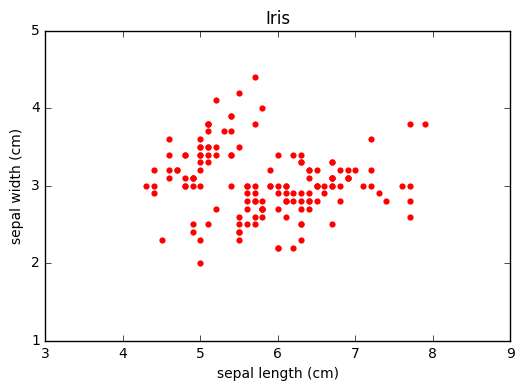

In [19]:
iris = datasets.load_iris()

plt.scatter(iris.data[:, 0], iris.data[:, 1], c="Red", marker='o', lw = 0)
plt.title("Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3.,9.)
plt.ylim(1.,5.)
plt.xticks(range(3,10))
plt.yticks(range(1,6))
plt.show()

Iterations: 9 

Group sizes:
 [50 53 47] 

Inter cluster distances:
[[ 0.          1.11560528  3.3824174 ]
 [ 1.11560528  0.          1.22583291]
 [ 3.3824174   1.22583291  0.        ]] 

Intra cluster average distance to center [ 0.43046153  0.39777166  0.43137976] 

Intra cluster maximum distance to center [ 1.22717562  1.03823144  1.30708623] 



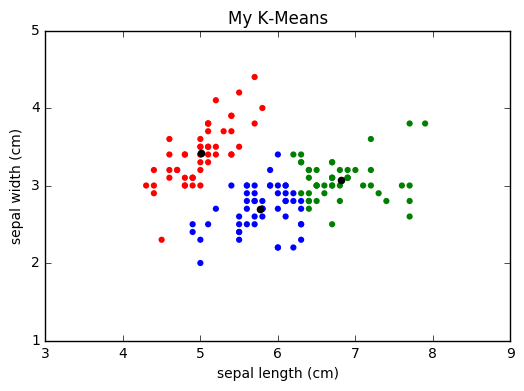

In [20]:
# Robimy sobie wektor d x N potrzebny do KMeans
irisData = np.array(iris.data).T
groups, centers, interCluster, intraClusterAvg, intraClusterMax = KMeans(3, irisData[:2,:], printInfo=True)

colormap={0: 'Red', 1:'Blue', 2:'Green'}
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=[colormap[i] for i in groups], marker='o', lw = 0)
plt.scatter(centers[0,:], centers[1,:], c="Black", marker='o', lw = 1)
plt.title("My K-Means")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3.,9.)
plt.ylim(1.,5.)
plt.xticks(range(3,10))
plt.yticks(range(1,6))
plt.show()

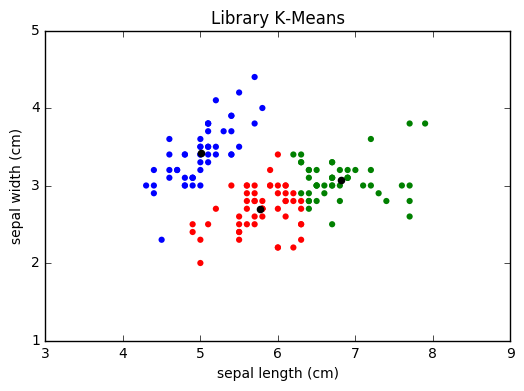

In [21]:
irisData = np.array(iris.data)
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(irisData[:,:2])

colormap={0: 'Red', 1:'Blue', 2:'Green'}
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=[colormap[i] for i in kmeans.labels_], marker='o', lw = 0)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="Black", marker='o', lw = 1)
plt.title("Library K-Means")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3.,9.)
plt.ylim(1.,5.)
plt.xticks(range(3,10))
plt.yticks(range(1,6))
plt.show()

Iterations: 4 

Group sizes:
 [61 39 50] 

Inter cluster distances:
[[  1.42108547e-14   3.19845877e+00   1.11985032e+01]
 [  3.19845877e+00   0.00000000e+00   2.48806831e+01]
 [  1.11985032e+01   2.48806831e+01   0.00000000e+00]] 

Intra cluster average distance to center [ 0.73110849  0.73184588  0.48413225] 

Intra cluster maximum distance to center [ 1.64680107  1.55155963  1.23935144] 



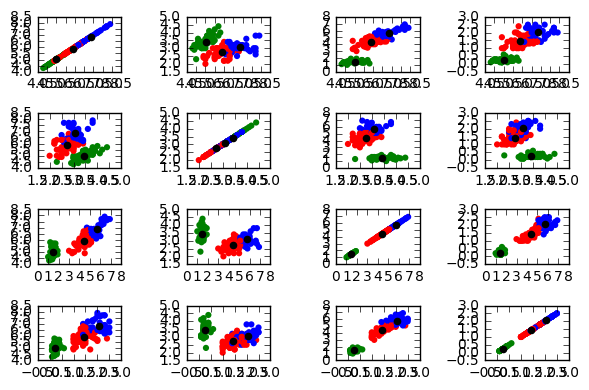

Id: 0 Group: 2 Species: setosa
Id: 1 Group: 2 Species: setosa
Id: 2 Group: 2 Species: setosa
Id: 3 Group: 2 Species: setosa
Id: 4 Group: 2 Species: setosa
Id: 5 Group: 2 Species: setosa
Id: 6 Group: 2 Species: setosa
Id: 7 Group: 2 Species: setosa
Id: 8 Group: 2 Species: setosa
Id: 9 Group: 2 Species: setosa
Id: 10 Group: 2 Species: setosa
Id: 11 Group: 2 Species: setosa
Id: 12 Group: 2 Species: setosa
Id: 13 Group: 2 Species: setosa
Id: 14 Group: 2 Species: setosa
Id: 15 Group: 2 Species: setosa
Id: 16 Group: 2 Species: setosa
Id: 17 Group: 2 Species: setosa
Id: 18 Group: 2 Species: setosa
Id: 19 Group: 2 Species: setosa
Id: 20 Group: 2 Species: setosa
Id: 21 Group: 2 Species: setosa
Id: 22 Group: 2 Species: setosa
Id: 23 Group: 2 Species: setosa
Id: 24 Group: 2 Species: setosa
Id: 25 Group: 2 Species: setosa
Id: 26 Group: 2 Species: setosa
Id: 27 Group: 2 Species: setosa
Id: 28 Group: 2 Species: setosa
Id: 29 Group: 2 Species: setosa
Id: 30 Group: 2 Species: setosa
Id: 31 Group: 2 Sp

In [22]:
irisData = np.array(iris.data).T
groups, centers, interCluster, intraClusterAvg, intraClusterMax = KMeans(3, irisData, printInfo=True)

colormap={0: 'Red', 1:'Blue', 2:'Green'}
plt.title("My K-Means")
d = irisData.shape[0]

for i in range(d):
    for j in range(d):
        plt.subplot(d, d, i*d+j+1)
        plt.scatter(iris.data[:, i], iris.data[:, j], c=[colormap[k] for k in groups], marker='o', lw = 0)
        plt.scatter(centers[i,:], centers[j,:], c="Black", marker='o', lw = 1)
plt.tight_layout()
plt.show()

for i in range(irisData.shape[1]):
    print("Id:", i, "Group:", groups[i], "Species:", iris.target_names[iris.target[i]])